# Import libraries for interactively working in the notebook

In [1]:
#Base modules
import sys
import os
from datetime import datetime as dati

#Basic 3rd party packages
import h5py
import numpy as np
import json

#GUI elements
import tkinter as Tk
from tkinter import filedialog

#For working with images
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar, SI_LENGTH_RECIPROCAL

#for generating some random numbers
import random

In [2]:
%matplotlib notebook

# My in-out modules for a few operations on Velox emd

In [2]:
import modules.io as io
import modules.plottingtools as pl



In [3]:
from modules.decorators import timeit 

In [31]:
import importlib
importlib.reload(io)

<module 'modules.io' from '/Users/nielscautaerts/Documents/Projects/BigMax/3_Software/VeloxMeta/TEMMETA/modules/io.py'>

# Creating dummy hdf5 file

In [16]:
with h5py.File("example.hdf5", "w") as nf:
    g1 = nf.create_group("Group1")
    g2 = nf.create_group("Group2/NestedGroup1")
    size = (100, 100)
    data = np.random.rand(*size)
    ds1 = g1.create_dataset("RandomImage", data = data)
    ds2 = g2.create_dataset("RandomThing", data = "Random string")
    #add some attributes
    g1.attrs["Attribute1"] = "Whatwhat"
    g1.attrs["Listatr"] = [0, 1, 2, 4]
    g2.attrs["Bla"] = 2
    g2.attrs["hmm"] = "Boo"
    ds1.attrs["What"] = "This is a dataset"
    ds2.attrs["teehee"] = "What is this"

# Visual file opening

In [ ]:
f = io.open_emd_gui()

# CLI file opening

In [4]:
filename = os.path.expanduser("~/ownCloud/emdData&Reader/TestData/April2019/1520 EDS-HAADF 20190410.emd")
f = h5py.File(filename, 'r')

# Inspection of HDF5 node

In [ ]:
help(io.scan_hdf5_node)

In [30]:
f["Data"]["Image/1c887212b79849869d14fd2b03db2481"]["Data"].shape

(512, 512, 1)

In [29]:
for k, v in f["Data/Image"].items():
    print(v["Data"].shape)

(512, 512, 1)
(512, 512, 1)
(512, 512, 239)
(512, 512, 1)


In [6]:
io.scan_hdf5_node(f["Data"])

Data
    Image
        1c887212b79849869d14fd2b03db2481
             - Data  ((512, 512, 1), float32)
             - FrameLookupTable  ((1,), uint32)
             - Metadata  ((60000, 1), uint8)
        515e962de04c4529b1e83a6c7ed565c7
             - Data  ((512, 512, 1), float32)
             - FrameLookupTable  ((1,), uint32)
             - Metadata  ((60000, 1), uint8)
        84c474d76cea419399ee5eac5d9838ac
             - Data  ((512, 512, 239), uint16)
             - FrameLookupTable  ((239,), uint32)
             - Metadata  ((60000, 239), uint8)
        ae260c6bc7ff47898f3321228d18ddbd
             - Data  ((512, 512, 1), float32)
             - FrameLookupTable  ((1,), uint32)
             - Metadata  ((60000, 1), uint8)
    Line
         - fde442a54d7d4654b6386a1657c3629c  ((1,), object)
    Spectrum
        ac8fabd7c5f94c17ba39dfda043c79af
             - Data  ((4096, 1), uint32)
             - Metadata  ((60000, 1), uint8)
    SpectrumImage
        c31266600d6f46329a4fbafcc

In [ ]:
io.scan_hdf5_node(f["Operations"], full_path = True, recursive = False)

# Dealing with metadata

In [ ]:
help(io.get_det_uuid)
help(io.get_meta_dict)
help(io.get_meta_dict_det_no)
help(io.print_pretty)
help(io.write_meta_json)    
help(io.read_meta_json)

## Examples

In [17]:
meta_test = io.get_meta_dict_det_no(f, "Image", det_no=0, frame = 0)
meta_test2 = io.get_meta_dict_det_no(f, "Image", det_no=2, frame = 0)

In [18]:
io.print_pretty(meta_test)

{
    "Acquisition": {
        "AcquisitionDatetime": {
            "DateTime": "0"
        },
        "AcquisitionStartDatetime": {
            "DateTime": "1554902425"
        },
        "BeamType": "",
        "SourceType": "Monochromator"
    },
    "BinaryResult": {
        "AcquisitionUnit": "",
        "CompositionType": "",
        "Detector": "SuperXG1",
        "Encoding": "",
        "Offset": {
            "x": "-9.016565482561257e-009",
            "y": "-9.016565482561257e-009"
        },
        "PixelSize": {
            "height": "3.522095891625491e-011",
            "width": "3.522095891625491e-011"
        },
        "PixelUnitX": "m",
        "PixelUnitY": "m"
    },
    "Core": {
        "MetadataDefinitionVersion": "7.9",
        "MetadataSchemaVersion": "v1/2013/07",
        "guid": "00000000000000000000000000000000"
    },
    "CustomProperties": {
        "Aperture[C1].Name": {
            "type": "string",
            "value": "2000"
        },
        "Apertu

In [19]:
print(meta_test["Core"]["MetadataDefinitionVersion"])

7.9


In [20]:
#accessing and converting the data in the metadata
timestamp = int(meta_test["Acquisition"]["AcquisitionStartDatetime"]["DateTime"])
print("Timestamp: ", timestamp)
starttime = dati.fromtimestamp(timestamp)
print("DateTime: ", starttime)

Timestamp:  1554902425
DateTime:  2019-04-10 15:20:25


# Working with Data

## Images

Saving an image to a file with a scalebar

In [ ]:
help(io.plot_single_image)

<IPython.core.display.Javascript object>


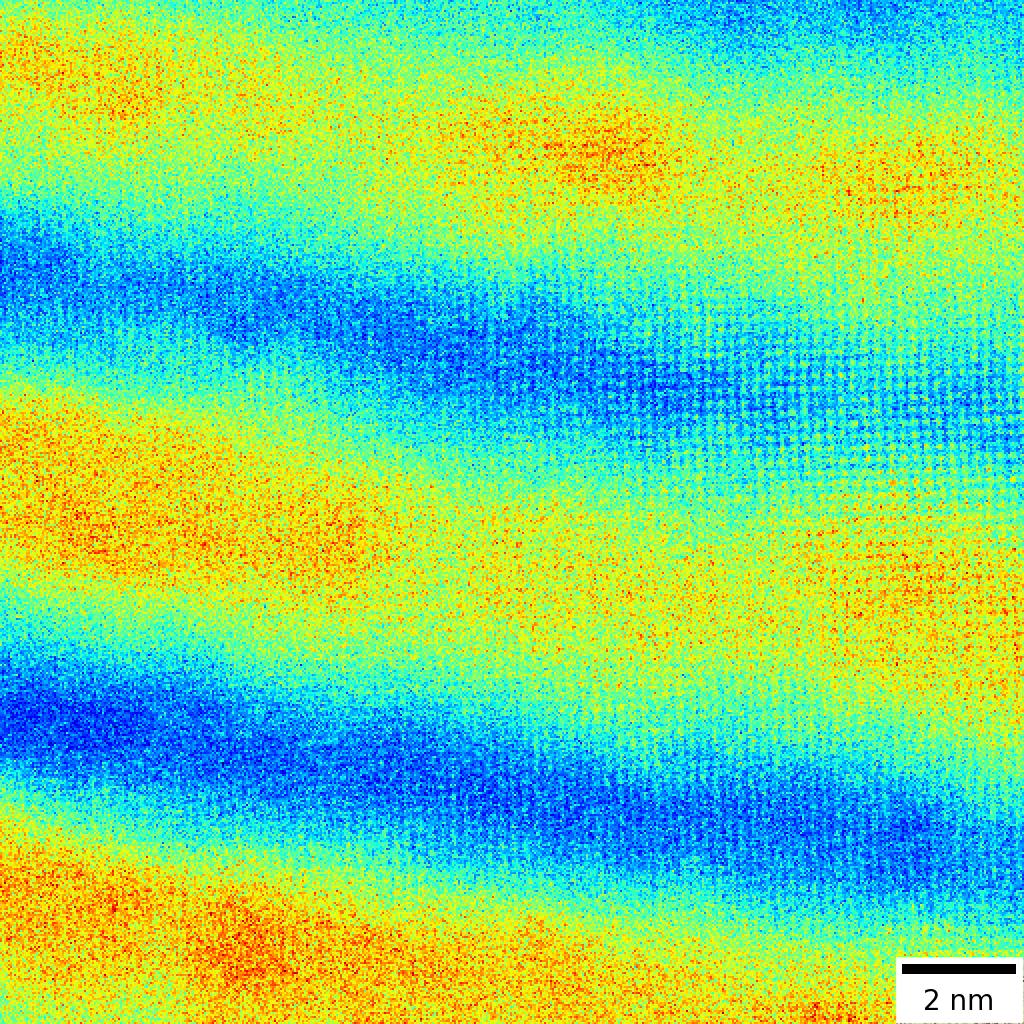

(<Figure size 512x512 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0xc17b3d650>)

In [21]:
im_stack = io.get_image_data_det_no(f, 2)
#first image in the stack
frame = 0
test_image = im_stack[:,:,frame]
metdat = io.get_meta_dict_det_no(f, "Image", det_no = 0, frame = frame)
io.plot_single_image(test_image, metdat, filename =  "testfigure.tiff", scale_bar = True, save_meta = True, show_fig = True,
                     imshow_kwargs = {"cmap" : "jet"})

In [5]:
io.save_all_image_frames(f, det_no = 2, name = "HAADFtest", path = "./Testimages/", imshow_kwargs = {"cmap": "Greys"})

## SpectrumStream

Converting to a format that is nicer to work with. All data is stored in an io.SpectrumStream object in the stream variable

In [9]:
#d, md1, md2, flut = get_spectrum_stream_frames(f, 0)
stream, d, md1, md2, flut, frames = io.get_spectrum_stream(f, one_matrix = True, re_all = True)

'get_spectrum_stream'  22342.66 ms


In [7]:
io.print_pretty(md1)

{
    "Acquisition": {
        "AcquisitionDatetime": {
            "DateTime": "0"
        },
        "AcquisitionStartDatetime": {
            "DateTime": "1554902425"
        },
        "BeamType": "",
        "SourceType": "Monochromator"
    },
    "BinaryResult": {
        "AcquisitionUnit": "",
        "CompositionType": "",
        "Detector": "SuperXG1",
        "Encoding": "",
        "Offset": {
            "x": "-9.016565482561257e-009",
            "y": "-9.016565482561257e-009"
        },
        "PixelSize": {
            "height": "3.522095891625491e-011",
            "width": "3.522095891625491e-011"
        },
        "PixelUnitX": "m",
        "PixelUnitY": "m"
    },
    "Core": {
        "MetadataDefinitionVersion": "7.9",
        "MetadataSchemaVersion": "v1/2013/07",
        "guid": "00000000000000000000000000000000"
    },
    "CustomProperties": {
        "Aperture[C1].Name": {
            "type": "string",
            "value": "2000"
        },
        "Apertu

There are two metadata arrays in the data, check their difference

In [8]:
import difflib

a = json.dumps(md1)
b = json.dumps(md2)

for i,s in enumerate(difflib.ndiff(a, b)):
    if s[0]==' ': continue
    elif s[0]=='-':
        print(u'Delete "{}" from position {}'.format(s[-1],i))
    elif s[0]=='+':
        print(u'Add "{}" to position {}'.format(s[-1],i))    

Add "1" to position 435
Add "5" to position 436
Add "5" to position 437
Add "4" to position 438
Add "9" to position 439
Add "2" to position 441
Add "8" to position 442
Add "0" to position 443
Add "3" to position 444
Add "3" to position 1119
Add "." to position 1120
Add "3" to position 1121
Add "7" to position 1122
Add "8" to position 1123
Add "6" to position 1124
Add "8" to position 1125
Add "7" to position 1126
Add "6" to position 1127
Add "0" to position 1128
Add "8" to position 1129
Add "9" to position 1130
Add "4" to position 1131
Add "2" to position 1132
Add "2" to position 1133
Add "5" to position 1134
Add "5" to position 1135
Add "1" to position 1136
Add "e" to position 1137
Add "-" to position 1138
Add "0" to position 1139
Add "1" to position 1140
Add "3" to position 1175
Add "." to position 1176
Add "3" to position 1177
Add "7" to position 1178
Add "8" to position 1179
Add "6" to position 1180
Add "8" to position 1181
Add "7" to position 1182
Add "6" to position 1183
Add "0" t

The spectrumstream data is extremely sparse and must be intelligently worked with. Here you can see how much memory different storage methods would require for the same array. Definitely we want to go with some sparse matrix representation! Important also is how fast we can do operations on these matrices. As a general rule, CSR is fast to perform row operations on, while CSC is fast to perform column operations on. DOK is not fast for operation but easy and intuitive to construct.

In [10]:
dtsizetest = stream.data
print("DOK: {} MB".format(sys.getsizeof(dtsizetest)/1000000))
print("CSR: {} MB".format(dtsizetest.tocsr().data.nbytes/1000000))
print("CSC: {} MB".format(dtsizetest.tocsc().data.nbytes/1000000))
print("Full: {} MB".format(sys.getsizeof(dtsizetest.toarray())/1000000))

DOK: 41.943168 MB
CSR: 1.481032 MB
CSC: 1.481032 MB
Full: 513248.591984 MB


Sum over all the pixels and frames to get a total spectrum

<IPython.core.display.Javascript object>


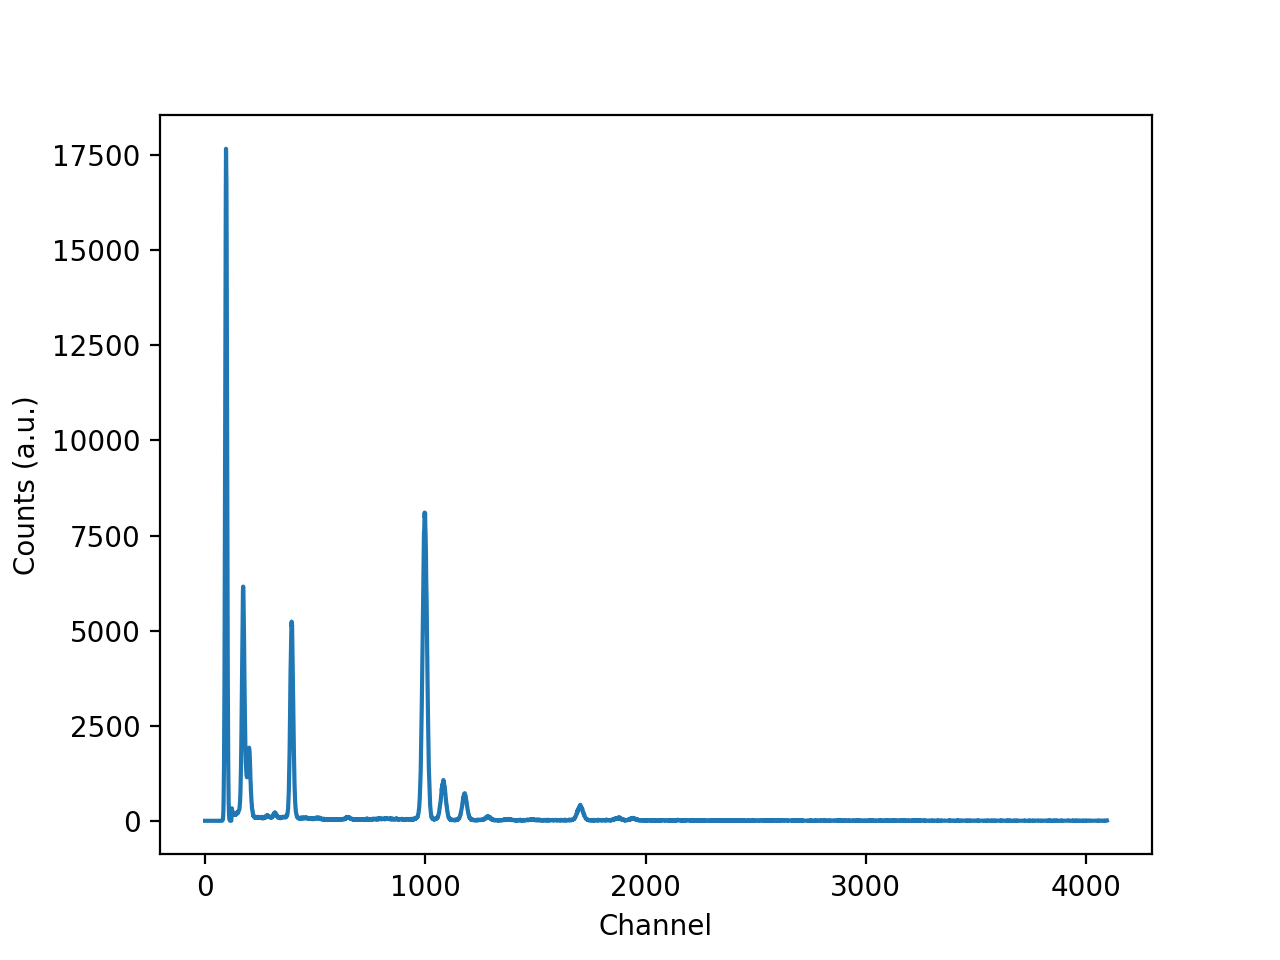

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c1f897f50>)

In [22]:
stream.plot_quick_spectrum(plot_channels = True)

It is possible to import the stream as a list of frames or as one large matrix. The rows represent a unique scan position (in the large matrix this is (x, y, frame), in the frame by frame list this is (x, y)) and the column an energy channel. The value is the number of counts captured there.

I've also implemented functions to switch between the large matrix representaiton and the list representation

In [11]:
strmlist = stream.get_frame_list()

Sum over all frames to get a 2D matrix representing the integrated stem edx data

In [12]:
smfrm = stream.get_frame_sum(comp_type = "csr")

Reshaping this into an intuitive 3D matrix with axes (channel, x, y). Querying stemedx[begin:end] slices across the channels

In [13]:
stemedx = stream.reshape_sparse_matrix(smfrm)

In [14]:
stemedx[3:6].shape

(3, 512, 512)

We can also import selected frames if we don't want all of them

In [15]:
someframes = io.get_spectrum_stream(f, frames = [0, 1,2,4], one_matrix = True)
someframes_list = io.get_spectrum_stream(f, frames = [0, 1,2,4], one_matrix = False)

'get_spectrum_stream'  670.25 ms
'get_spectrum_stream'  635.92 ms


There are far fewer counts when we don't use all the frames

<IPython.core.display.Javascript object>


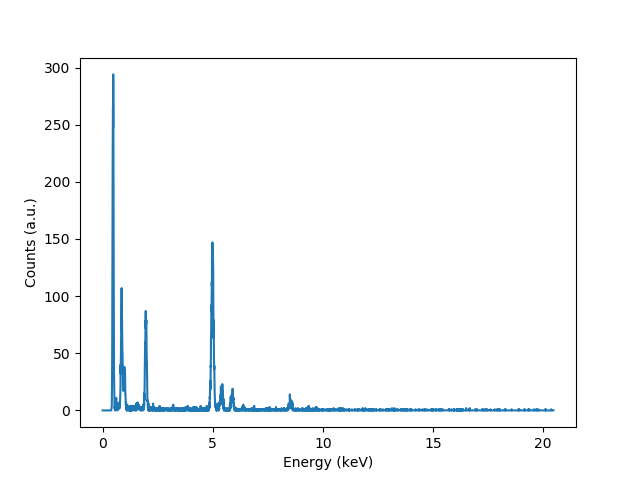

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119ee0e90>)

In [16]:
someframes_list.plot_quick_spectrum()

Let's now actually plot some images created from the spectrum by filtering/integrating on channels and reshaping into an image. First we determine the peaks.

<IPython.core.display.Javascript object>


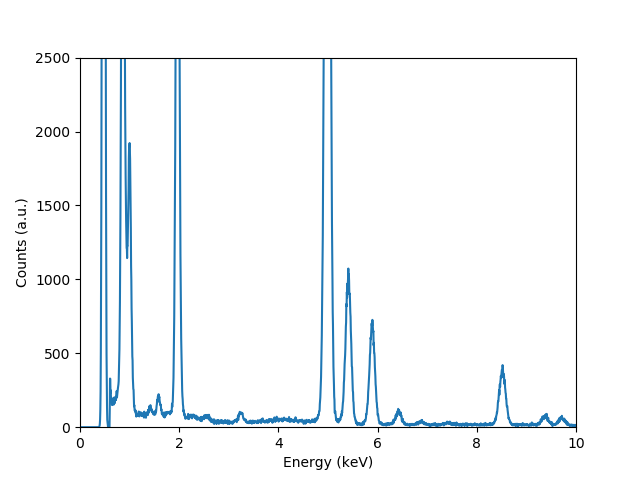

(0, 2500)

In [17]:
fig, ax = stream.plot_quick_spectrum(plot_channels = False)
ax.set_xlim(0, 10)
ax.set_ylim(0,2500)

In [11]:
from scipy.signal import find_peaks

In [12]:
peaks, props = find_peaks(stream.tot_spectrum, height = 300 , width = 10)

<IPython.core.display.Javascript object>


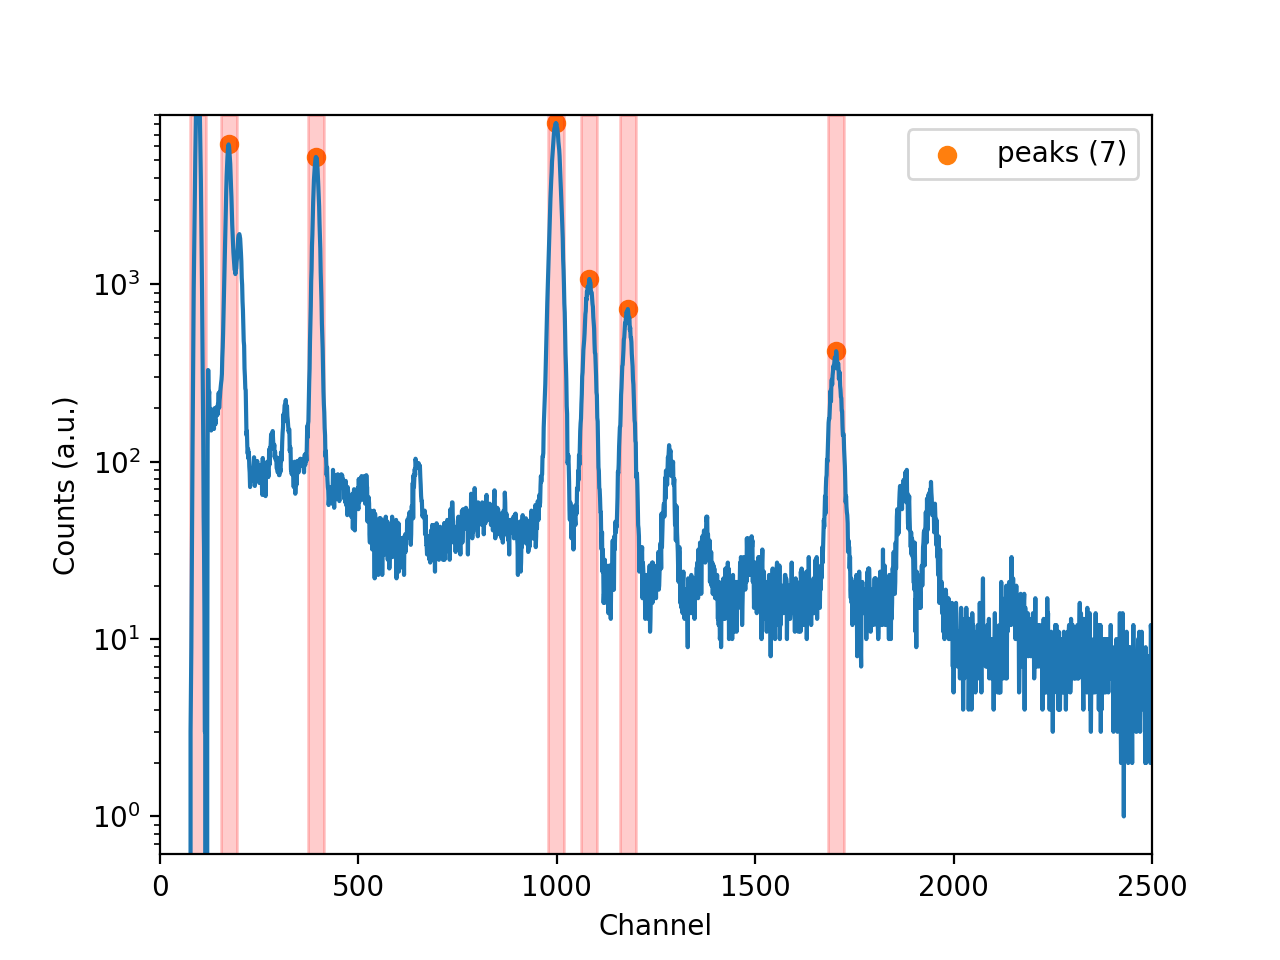

In [13]:
fig, ax = stream.plot_quick_spectrum(plot_channels = True)
ax.set_yscale('log')
ax.scatter(peaks, stream.tot_spectrum[peaks], label = "peaks ({})".format(len(peaks)), color = "C1")

w = 40
for i in peaks:
    ax.axvspan(i-w/2, i+w/2, alpha=0.2, color='red')

ax.set_xlim(0, 2500)
ax.set_ylim([None, 9000])
ax.legend()

Based on these peaks we can decide on channels we want to integrate. The counts are extremely low so we do a binning to see significant changes.

<IPython.core.display.Javascript object>


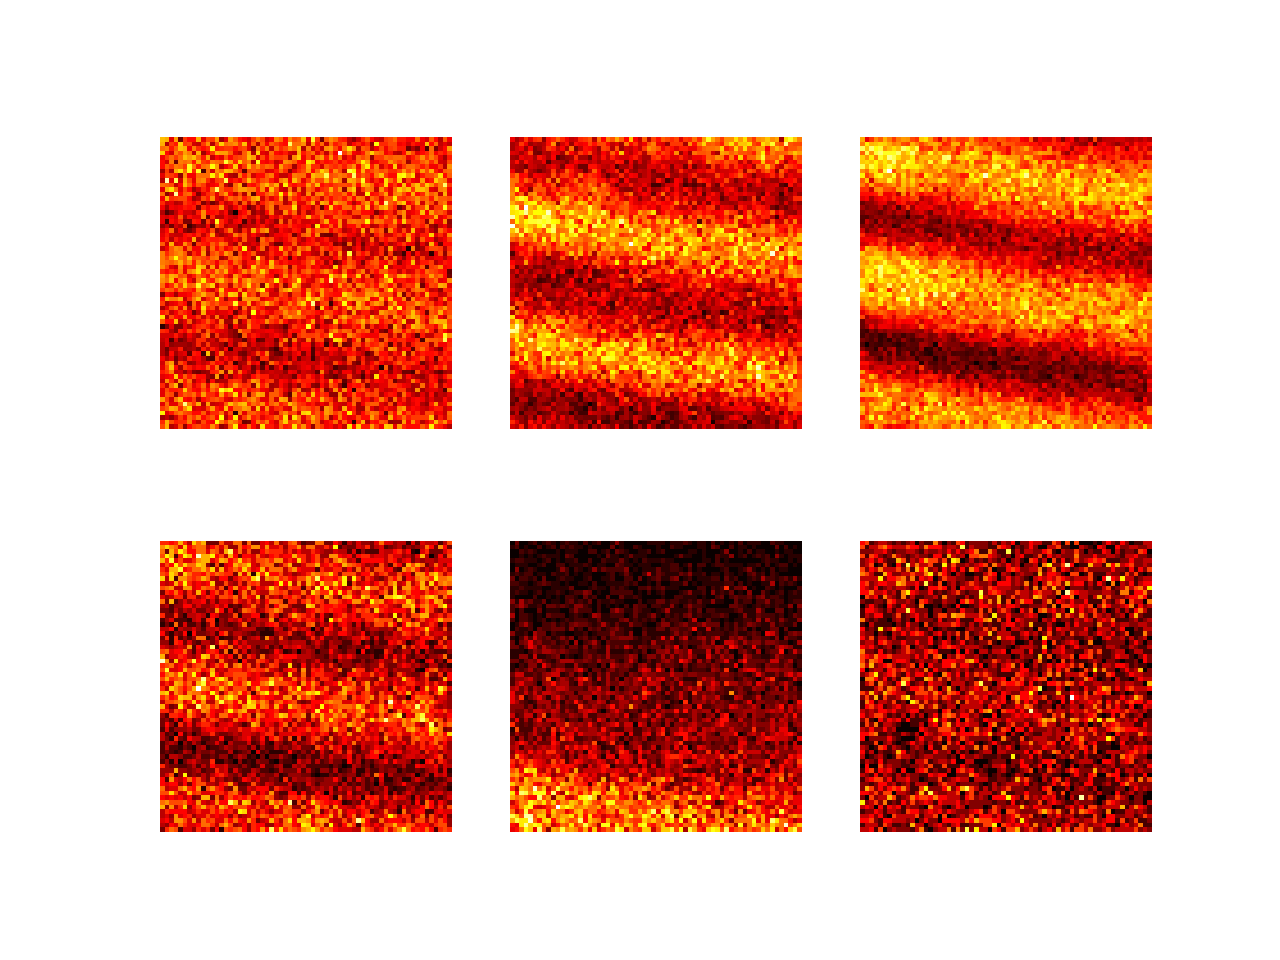

In [14]:
numsb = len(peaks[1:]) #the first entry is not of interest
ipc = 3
fig, ax = plt.subplots(numsb // ipc, ipc)
axes = ax.ravel()

rebin_peak_imgs = []

w=40
rbs = 64
for j, i in enumerate(peaks[1:]):
    energy = i*stream.disp/1000
    width = w*stream.disp/1000
    dt = stream.get_image_peak_sum(energy, width)
    dt_r = pl.rebin(dt, [rbs, rbs])
    rebin_peak_imgs.append(dt_r)
    axes[j].imshow(dt_r, cmap = "hot")
    axes[j].set_axis_off()

<IPython.core.display.Javascript object>


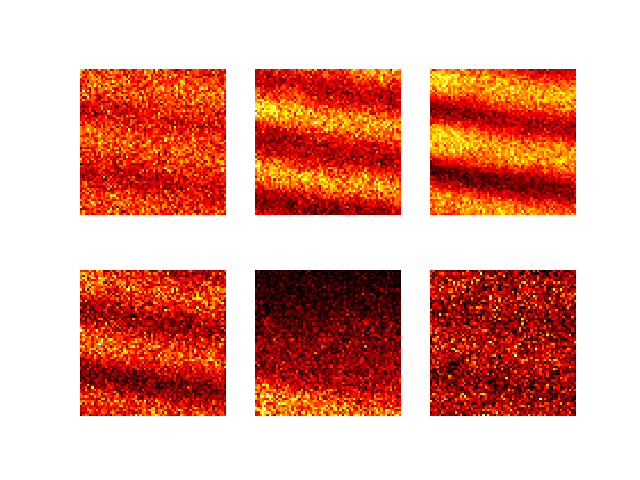

In [22]:
plt.show()

I also built a shortcut function which also allows for including scale bars, but it does not yet include any binning options. In any case, one likely prefers full flexibility on creating these kinds of images. Below I illustrate this function, you can see that most pixels have 0 counts and only very few have 4 or 5.

In [23]:
help(stream.plot_energy_image)

Help on method plot_energy_image in module modules.io:

plot_energy_image(energy: float, width: float, scale_bar: bool = True, show_fig: bool = True, dpi: int = 100, save_meta: bool = True, sb_settings: dict = {'location': 'lower right', 'color': 'k', 'length_fraction': 0.15}, imshow_kwargs: dict = {}, savefile: str = '') method of modules.io.SpectrumStream instance
    Plot and potentially save an image representing the sum of counts over all frames
    within a particular energy window.
    
    Args:
    energy (float) : the energy to plot in keV
    width (float) : the energy window to integrate over
    scale_bar (bool) = True : whether to add a scale bar to the image. Metadata must contain this information.
    show_fig (bool) = True : whether to show the figure
    dpi (int) = 100 : dpi to save the image with
    save_meta (bool) = True : save the metadata also as a separate json file with the same filename as the image
    sb_settings (dict) = {"location":'lower right', "color"

<IPython.core.display.Javascript object>


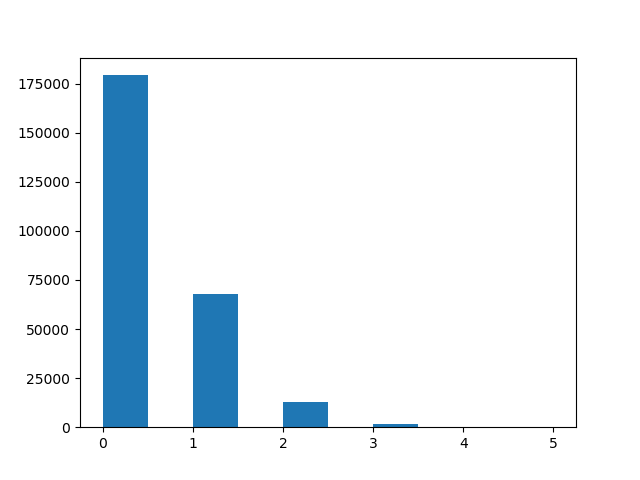

(array([1.79322e+05, 0.00000e+00, 6.80700e+04, 0.00000e+00, 1.29770e+04,
        0.00000e+00, 1.59800e+03, 0.00000e+00, 1.66000e+02, 1.10000e+01]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

In [25]:
disp = stream.disp
energy = peaks[1]*disp/1000
width = w*disp/1000
dt = stream.get_image_peak_sum(energy, width)
dt_hst = dt.ravel()

plt.ion()
fig, ax = plt.subplots(1)
ax.hist(dt_hst)


Checking that we don't lose any counts in the operations. All the counts in the window selected in the spectrum is equal to the total counts in the image.

In [26]:
stream.tot_spectrum[(peaks[1]-w//2) : (peaks[1]+w//2)].sum()

99537

In [27]:
dt.sum()

99537

<IPython.core.display.Javascript object>


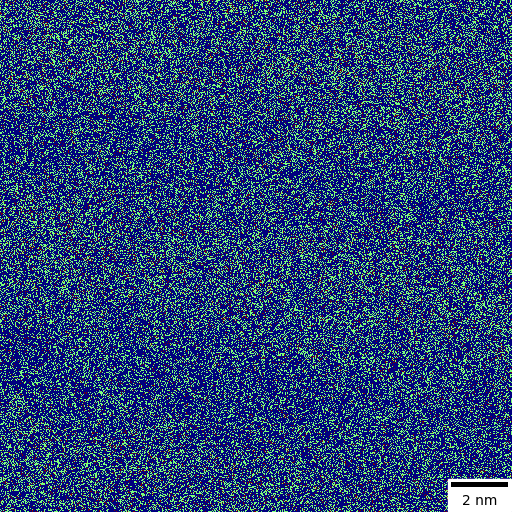

<IPython.core.display.Javascript object>


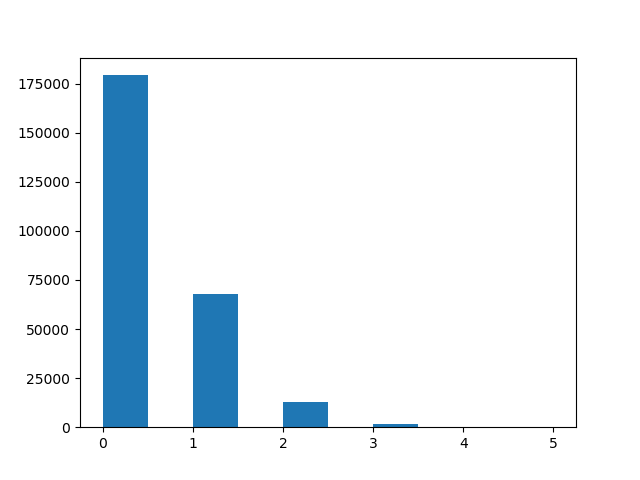

(<Figure size 512x512 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x1194a3ad0>)

In [28]:
stream.plot_energy_image(energy, width, imshow_kwargs = {"cmap" : "jet", "vmin" : 0, "vmax" : 2})

<IPython.core.display.Javascript object>


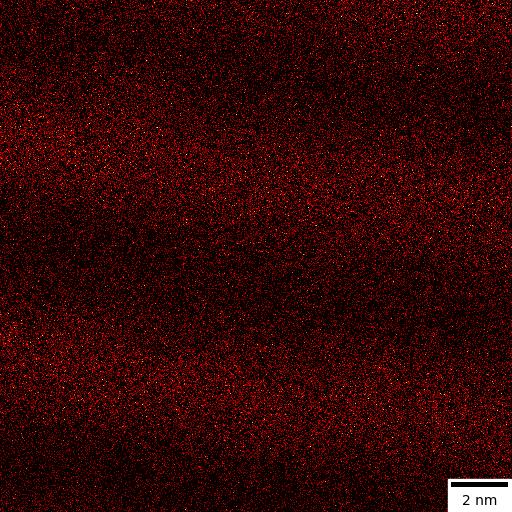

(<Figure size 512x512 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x119a24f50>)

In [29]:
stream.plot_energy_image(peaks[2]/1000*disp, width, imshow_kwargs = {"cmap" : "hot"})

Finally we may construct an RGB image by combining separate images and mapping their intensity to the R, G and B channels. This is shown for peak 1, 2 and 4. Peak 4 appears to come fro the region in the lower left corner and probably is some other phase.

<IPython.core.display.Javascript object>


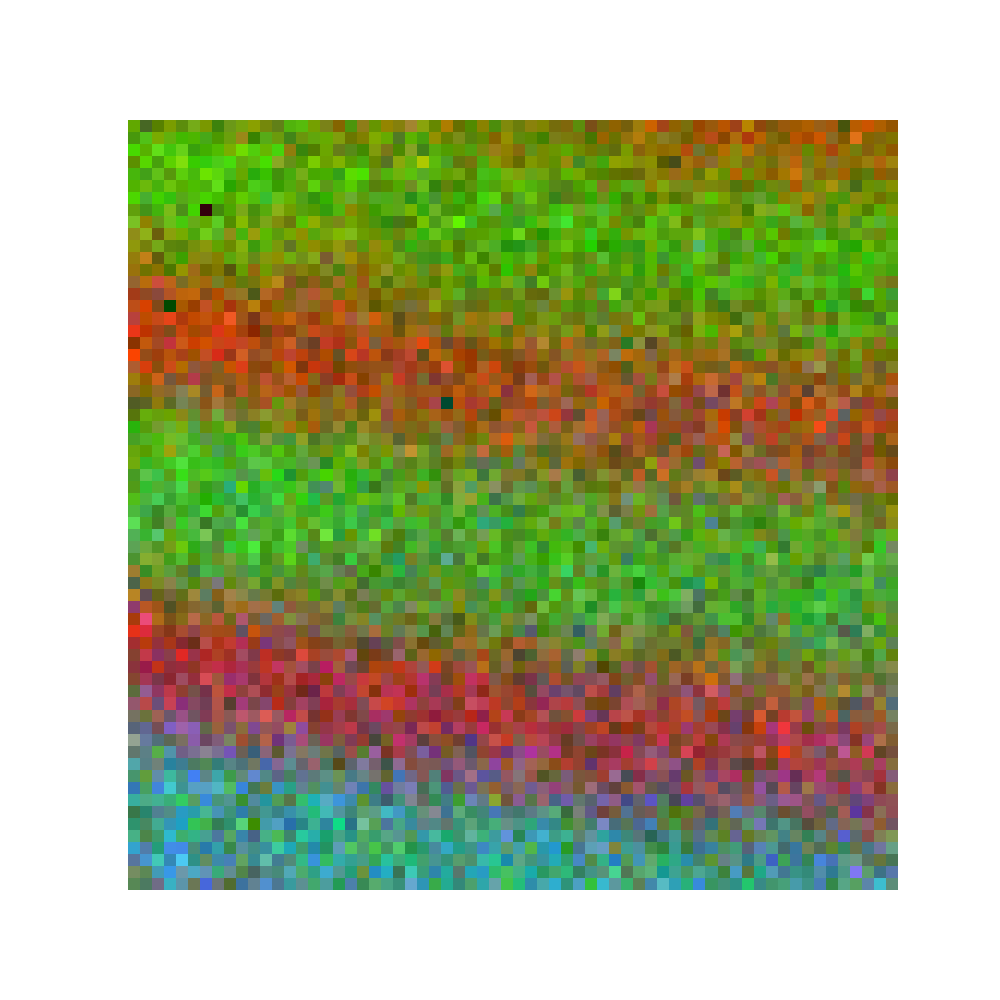

In [15]:
fig, ax = plt.subplots(1, figsize = (5, 5), frameon = False)

r = rebin_peak_imgs[1]
g = rebin_peak_imgs[2]
b = rebin_peak_imgs[4]

RGB = np.zeros((rbs,rbs,3), 'uint8')
RGB[..., 0] = r*256//np.max(r)
RGB[..., 1] = g*256//np.max(g)
RGB[..., 2] = b*256//np.max(b)

ax.imshow(RGB)
ax.set_axis_off()

#ax.imshow(rebin_peak_imgs[1], cmap = "Reds", alpha = 0.5)
#ax.imshow(rebin_peak_imgs[2], cmap = "Blues", alpha = 0.5)
#ax.imshow(rebin_peak_imgs[2], cmap = "Greens", alpha = 0.5)

Save your work

In [ ]:
fig.savefig("RGBp124.png", dpi = 100)

# Hyperspy parsers

In [34]:
#Higher level 3rd party packages
import hyperspy.api as hs


In [35]:
fhs = hs.load(filename)

In [36]:
fhs

[<EDSTEMSpectrum, title: EDS, dimensions: (|4096)>,
 <Signal2D, title: Al, dimensions: (|512, 512)>,
 <Signal2D, title: Ti, dimensions: (|512, 512)>,
 <Signal2D, title: HAADF, dimensions: (|512, 512)>,
 <Signal2D, title: N, dimensions: (|512, 512)>,
 <EDSTEMSpectrum, title: EDS, dimensions: (512, 512|4096)>]

In [ ]:
#hyperspy interpreted metadata
help(type(fhs[5]))

In [40]:
fhs[5].original_metadata

├── Acquisition
│   ├── AcquisitionDatetime
│   │   └── DateTime = 0
│   ├── AcquisitionStartDatetime
│   │   └── DateTime = 1554902425
│   ├── BeamType = 
│   └── SourceType = Monochromator
├── BinaryResult
│   ├── AcquisitionUnit = 
│   ├── CompositionType = 
│   ├── Detector = SuperXG1
│   ├── Encoding = 
│   ├── Offset
│   │   ├── x = -9.016565482561257e-009
│   │   └── y = -9.016565482561257e-009
│   ├── PixelSize
│   │   ├── height = 3.522095891625491e-011
│   │   └── width = 3.522095891625491e-011
│   ├── PixelUnitX = m
│   └── PixelUnitY = m
├── Core
│   ├── MetadataDefinitionVersion = 7.9
│   ├── MetadataSchemaVersion = v1/2013/07
│   └── guid = 00000000000000000000000000000000
├── CustomProperties
│   ├── Aperture[C1].Name
│   │   ├── type = string
│   │   └── value = 2000
│   ├── Aperture[C2].Name
│   │   ├── type = string
│   │   └── value = 50
│   ├── Aperture[C3].Name
│   │   ├── type = string
│   │   └── value = 2000
│   ├── Aperture[OBJ].Name
│   │   ├── type = string
│

In [41]:
fhs[3].original_metadata

├── Acquisition
│   ├── AcquisitionDatetime
│   │   └── DateTime = 0
│   ├── AcquisitionStartDatetime
│   │   └── DateTime = 1554902426
│   ├── BeamType = 
│   └── SourceType = Monochromator
├── BinaryResult
│   ├── AcquisitionUnit = 
│   ├── CompositionType = 
│   ├── Detector = HAADF
│   ├── DetectorIndex = 6
│   ├── Encoding = 
│   ├── Offset
│   │   ├── x = -9.016565482561257e-009
│   │   └── y = -9.016565482561257e-009
│   ├── PixelSize
│   │   ├── height = 3.522095891625491e-011
│   │   └── width = 3.522095891625491e-011
│   ├── PixelUnitX = m
│   └── PixelUnitY = m
├── Core
│   ├── MetadataDefinitionVersion = 7.9
│   ├── MetadataSchemaVersion = v1/2013/07
│   └── guid = 00000000000000000000000000000000
├── CustomProperties
│   ├── Aperture[C1].Name
│   │   ├── type = string
│   │   └── value = 2000
│   ├── Aperture[C2].Name
│   │   ├── type = string
│   │   └── value = 50
│   ├── Aperture[C3].Name
│   │   ├── type = string
│   │   └── value = 2000
│   ├── Aperture[OBJ].Name
│   